<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [6]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
import pandas as pd

df = pd.read_csv('./data/job_listings.csv')

In [7]:
def clean_description(desc):

    soup = BeautifulSoup(desc)

    return soup.get_text()

df['clean_desc'] = df['description'].apply(clean_description)

## 2) Use Spacy to tokenize the listings 

In [8]:
##### Your Code Here #####
from spacy.tokenizer import Tokenizer 
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [12]:
# tokenizer pipe
tokens = []

for doc in tokenizer.pipe(df['clean_desc'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df['tokens'] = tokens

In [23]:
df.head()

,Unnamed: 0,description,title,clean_desc,tokens
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ...","[b""Job, Requirements:\nConceptual, understandi..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo...","[b'Job, Description\n\nAs, a, Data, Scientist,..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...,"[b'As, a, Data, Scientist, you, will, be, work..."
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen...","[b'$4,969, -, $6,756, a, monthContractUnder, t..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...,"[b'Location:, USA, \xe2\x80\x93, multiple, loc..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [31]:
##### Your Code Here #####
from sklearn.feature_extraction.text import CountVectorizer

# list of text documents
text = df['clean_desc']

# create the transformer
vect = CountVectorizer(stop_words='english')

# build vocab
vect.fit(text)

# transform text
dtm = vect.transform(text)

In [32]:
dtm.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 2, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

# 4) Visualize the most common words

In [33]:
##### Your Code Here #####
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

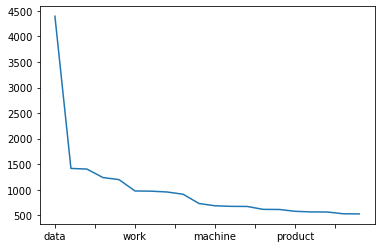

In [51]:
common = dtm.sum().nlargest(20)
common.plot();

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [52]:
##### Your Code Here #####
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm_tf = tfidf.fit_transform(text)

# Get feature names to use as dataframe column headers
dtm_tf = pd.DataFrame(dtm_tf.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm_tf.head()

,000,04,10,100,1079302,11,12,125,14,15,...,years,yearthe,yes,yeti,york,young,yrs,zeus,zf,zillow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.093431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [54]:
##### Your Code Here #####
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')

# Fit on DTM
nn.fit(dtm_tf)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [57]:
nn.kneighbors([dtm_tf.iloc[0].values])[1]

array([[  0, 336, 276, 274, 366]], dtype=int64)

In [66]:
mylisting = '''Partner with other decision scientists to help our marketing teams make well-informed decisions backed by product usage and survey results as well as help execute and measure our marketing efforts.
Translate data insights into actions and recommendations that will drive brand sentiment, user growth and engagement, and marketing effectiveness
Produce data visualization such as charts, infographic, and dashboards to communicate findings and actionable recommendations to internal stakeholders clearly and effectively
Develop quantitative analysis, tools, ad hoc reports, and models to support marketing decision making. Analysis areas might include (but not limited to): retention, sentiment, lifetime value, messaging, promotions, usage, and engagement
Must Haves:
5+ years of experience in data analysis, data science, decision science, or similar quantitative fields, applying experimentation methods to test various hypotheses for customer segmentation, consumer sentiment or perception, and outbound online marketing campaign evaluation
Experience finding, cleaning, and manipulating data to build data sets
Experience using R or Python or a similar scripting language for statistical modeling
Experience with SQL, Hive, Presto, Hadoop, or other data querying languages.
Statistical modeling and data analysis experience, Experience developing data pipelines, Experience using open-source statistical packages such as Dplyr, Rstudio, NumPy, Pandas, Basic experience or basic understanding of machine learning, data mining, and natural language processing'''
mylisting_vect = tfidf.transform([mylisting])
nn.kneighbors(mylisting_vect.todense())[1]

array([[327, 414, 201,  51, 326]], dtype=int64)

In [69]:
print(text.iloc[327])

b'If you\xe2\x80\x99re ready to innovate and help lead the development for Hewlett Packard Enterprise\xe2\x80\x99s (HPE) Analytics Platform, come join us now! You will be part of an organization that is revolutionizing reporting solutions and architecting a data and analytics landscape that is simplified, modern, flexible and will ultimately enable HPE on its transformation journey and beyond.\nJob Overview:\nWe are looking for a Data Scientist who will support our product, sales, leadership and marketing teams with insights gained from analyzing company data. The ideal candidate is adept at using large data sets to find opportunities for product and process optimization and using models to test the effectiveness of different courses of action. They must have strong experience using a variety of data mining/data analysis methods, using a variety of data tools, building and implementing models, using/creating algorithms and creating/running simulations. They must have a proven ability t